In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras import backend as K
from keras import regularizers
from scipy.io import loadmat

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
#image rows and columns = 28
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
#10 cuz there are 10 classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential([
    Conv2D(20, kernel_size = 3, strides = 2, bias_initializer = "zeros", kernel_initializer='he_normal', input_shape = input_shape), #this input shape is the one in the function above
    Activation('relu'),
    Conv2D(30, kernel_size = 3 , strides = 2, kernel_regularizer = regularizers.l2(0.01)),
    Activation('relu'),
    Flatten(),
    Dropout(0.1),
    Dense(128, kernel_regularizer = regularizers.l2(0.001)),
    Activation('relu'),
    Dropout(.2),
    Dense(64, kernel_regularizer = regularizers.l2(0.01)),
    Activation('relu'),
    Dropout(.3),
    Dense(32, kernel_regularizer = regularizers.l2(0.01)),
    Activation('relu'),
    Dropout(.4),
    Dense(16, kernel_regularizer = regularizers.l2(0.01)),
    Activation('relu'),
    Dropout(.5),
    Dense(10, kernel_regularizer = regularizers.l2(0.001)),
    Activation('softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 20)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 30)          5430      
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1080)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1080)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [11]:
callbacks = []
callbacks.append(EarlyStopping('val_accuracy', patience=50, restore_best_weights=True))
callbacks.append(ModelCheckpoint("best-weights.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, period=10))

In [12]:
model.compile(optimizer = 'adam', 
              loss = "categorical_crossentropy", 
              metrics = ['accuracy'])

In [13]:
h = model.fit(x_train, y_train, batch_size = 1000, epochs = 10, validation_data=(x_test, y_test), callbacks = callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 3.3750 - accuracy: 0.2424 - val_loss: 2.2613 - val_accuracy: 0.7631
Epoch 2/10
60000/60000 [==============================] - 7s 111us/step - loss: 2.1781 - accuracy: 0.4762 - val_loss: 1.2969 - val_accuracy: 0.8924
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 1.6111 - accuracy: 0.6179 - val_loss: 0.8877 - val_accuracy: 0.9316
Epoch 4/10
60000/60000 [==============================] - 9s 143us/step - loss: 1.3462 - accuracy: 0.6897 - val_loss: 0.7046 - val_accuracy: 0.9497
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 1.1941 - accuracy: 0.7396 - val_loss: 0.6070 - val_accuracy: 0.9528
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 1.1031 - accuracy: 0.7668 - val_loss: 0.5562 - val_accuracy: 0.9600
Epoch 7/10
60000/60000 [==============================] - 4s 72

In [14]:
'print(h.history.keys())'

'print(h.history.keys())'

In [15]:
accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy UNTRAINED: {h.history['val_accuracy'][-1]:.02f}")
print(f"Final Loss on Testing Data UNTRAINED: {accuracy[0]:02f}")
print(f"Final Untrained Test ACCURACY: {accuracy[1]:02f}")

10000/10000 [==============================] - 0s 42us/step
Validation Accuracy UNTRAINED: 0.97
Final Loss on Testing Data UNTRAINED: 0.469837
Final Untrained Test ACCURACY: 0.966300


In [16]:
model.load_weights("best-weights.hdf5")
accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy UNTRAINED: {h.history['val_accuracy'][-1]:.02f}")
print(f"Final Loss on Testing Data TRAINED: {accuracy[0]:02f}")
print(f"Final Trained Test ACCURACY: {accuracy[1]:02f}")

10000/10000 [==============================] - 0s 40us/step
Validation Accuracy UNTRAINED: 0.97
Final Loss on Testing Data TRAINED: 0.469837
Final Trained Test ACCURACY: 0.966300


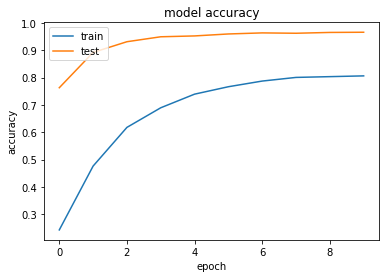

In [17]:
##ACCURACY GRAPH
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

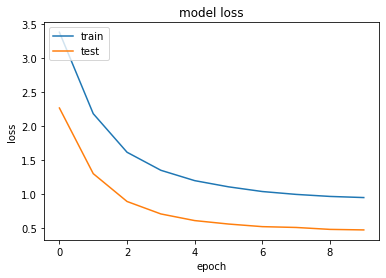

In [18]:
##LOSS GRAPH
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

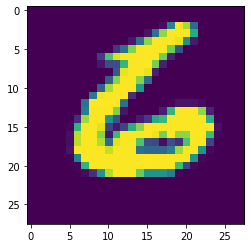

In [19]:
plt.imshow(x_test[9999].reshape(28, 28))

In [20]:
def odd_or_even(pred):
    if (pred%2 == 0):
        return "even"
    else:
        return "odd"

In [21]:
x_test[3].shape

(28, 28, 1)

In [53]:
even_odd = {}
for index in range(10000):
    pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
    even_odd[index] = [pred.argmax(), odd_or_even(pred.argmax())]

In [54]:
even_odd

{0: [7, 'odd'],
 1: [2, 'even'],
 2: [1, 'odd'],
 3: [0, 'even'],
 4: [4, 'even'],
 5: [1, 'odd'],
 6: [4, 'even'],
 7: [9, 'odd'],
 8: [5, 'odd'],
 9: [9, 'odd'],
 10: [0, 'even'],
 11: [6, 'even'],
 12: [9, 'odd'],
 13: [0, 'even'],
 14: [1, 'odd'],
 15: [5, 'odd'],
 16: [9, 'odd'],
 17: [7, 'odd'],
 18: [3, 'odd'],
 19: [4, 'even'],
 20: [9, 'odd'],
 21: [6, 'even'],
 22: [6, 'even'],
 23: [5, 'odd'],
 24: [4, 'even'],
 25: [0, 'even'],
 26: [7, 'odd'],
 27: [4, 'even'],
 28: [0, 'even'],
 29: [1, 'odd'],
 30: [3, 'odd'],
 31: [1, 'odd'],
 32: [3, 'odd'],
 33: [4, 'even'],
 34: [7, 'odd'],
 35: [2, 'even'],
 36: [7, 'odd'],
 37: [1, 'odd'],
 38: [2, 'even'],
 39: [1, 'odd'],
 40: [1, 'odd'],
 41: [7, 'odd'],
 42: [4, 'even'],
 43: [2, 'even'],
 44: [3, 'odd'],
 45: [5, 'odd'],
 46: [1, 'odd'],
 47: [2, 'even'],
 48: [4, 'even'],
 49: [4, 'even'],
 50: [6, 'even'],
 51: [3, 'odd'],
 52: [5, 'odd'],
 53: [5, 'odd'],
 54: [6, 'even'],
 55: [0, 'even'],
 56: [4, 'even'],
 57: [1, 'odd']

In [ ]:
def odd_or_even(pred):
    if (pred%2 == 0):
        return "even"
    else:
        return "odd"